## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Load the dataset

In [2]:
df = pd.read_csv("insurance.csv")

## Exploratory Data Analysis
Exploratory Data Analysis(EDA), also known as Data Exploration, is a step in the Data Analysis Process, where a number of techniques are used to better understand the dataset being used.

In [3]:
# Display first five records of data
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
# Display last five records of data
df.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [5]:
# Number of rows and columns
df.shape

(1338, 7)

In [6]:
# list the types of columns
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [7]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Statistical Summary
df.describe(include='all')

,age,sex,bmi,children,smoker,region,expenses
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.665471,1.094918,NaN,NaN,13270.422414
std,14.049960,NaN,6.098382,1.205493,NaN,NaN,12110.011240
min,18.000000,NaN,16.000000,0.000000,NaN,NaN,1121.870000
25%,27.000000,NaN,26.300000,0.000000,NaN,NaN,4740.287500
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.030000
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16639.915000


In [9]:
df.dtypes[df.dtypes == 'object'].index

Index(['sex', 'smoker', 'region'], dtype='object')

## Check for missing data

In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

## Drop the Duplicates

In [11]:
df.shape

(1338, 7)

In [12]:
df=df.drop_duplicates()

In [13]:
df.shape

(1337, 7)

As we can clearly see we were having just one duplicate row which has been removed by this function.

## Univariate Analysis

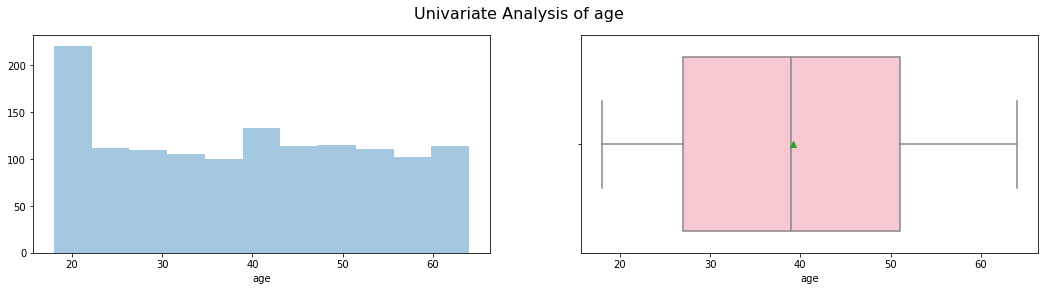

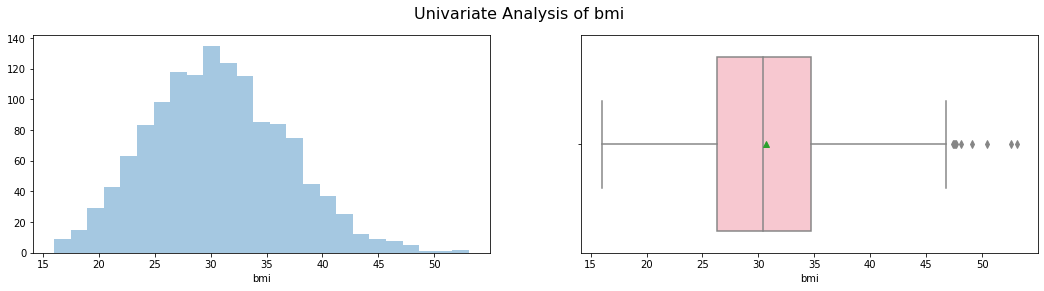

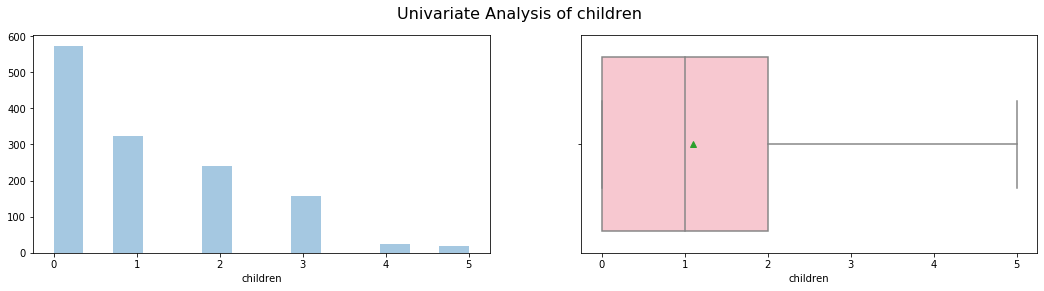

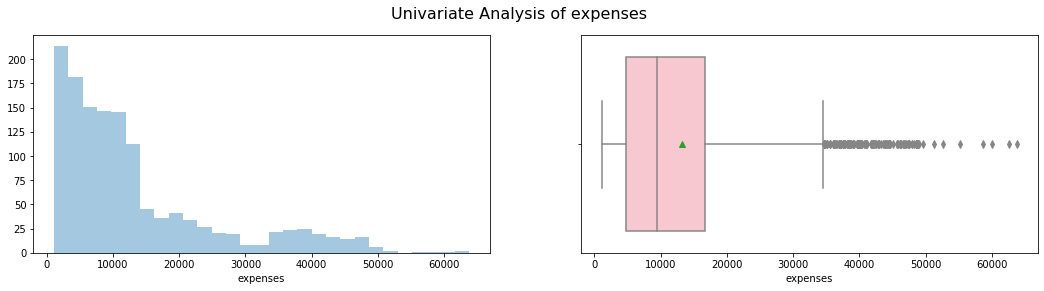

In [14]:
x_axis = ["age", "bmi", "children", "expenses"]
for x in x_axis:
    fig, axes = plt.subplots(1, 2, figsize=(18,4))
    sns.distplot(df[x], ax=axes[0], kde = False)
    sns.boxplot(df[x], ax=axes[1], orient = "h", showmeans = True, color = "pink")
    fig.suptitle('Univariate Analysis of ' + x, fontsize=16)

In [15]:
df.columns.tolist()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses']

## Bi variate Analysis

In [16]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

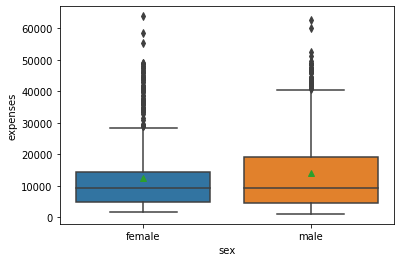

In [17]:
sns.boxplot(x = "sex", y = "expenses", data = df, showmeans = True)

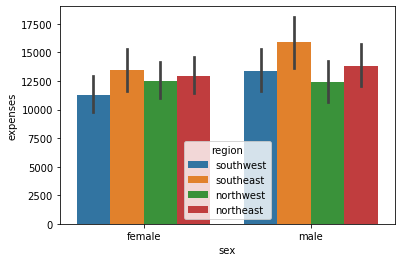

In [18]:
sns.barplot(x = "sex", y = "expenses",hue='region', data = df)

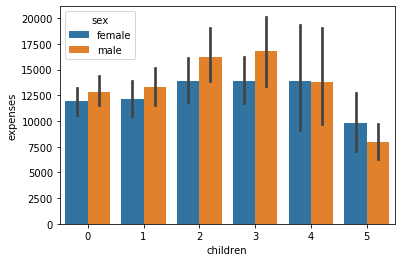

In [19]:
sns.barplot(x = "children", y = "expenses",hue='sex', data = df)

In [20]:
df['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

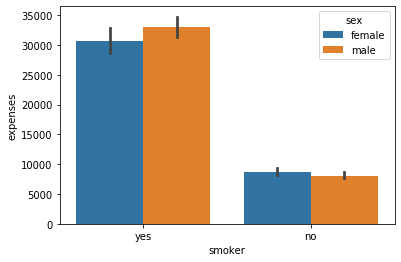

In [21]:
sns.barplot(x='smoker',y='expenses',hue='sex',data=df)

As we can see here expenses for smokers are greater than that of non smokers for both the genders

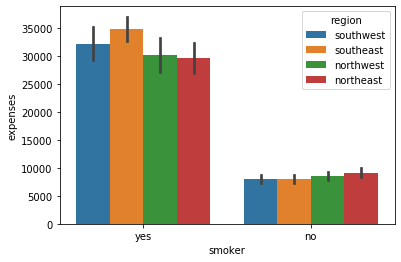

In [22]:
sns.barplot(x='smoker',y='expenses',hue='region',data=df)

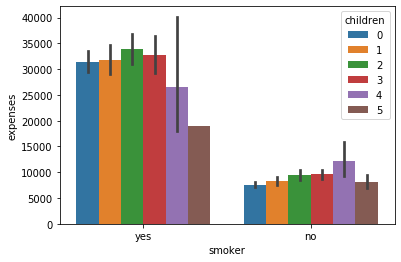

In [23]:
sns.barplot(x='smoker',y='expenses',hue='children',data=df)

In [24]:
df['region'].value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

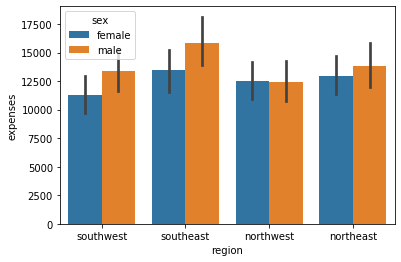

In [25]:
sns.barplot(x='region',y='expenses',hue='sex',data=df)

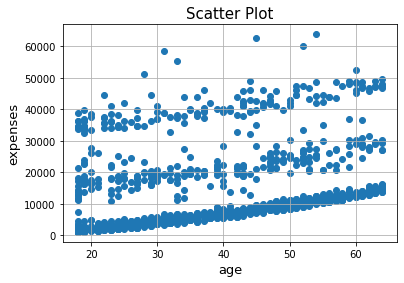

In [26]:
# let's check age versus expenses scatterplot
plt.scatter(df["age"], df["expenses"])
plt.xlabel("age", fontsize = 13)
plt.ylabel("expenses", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

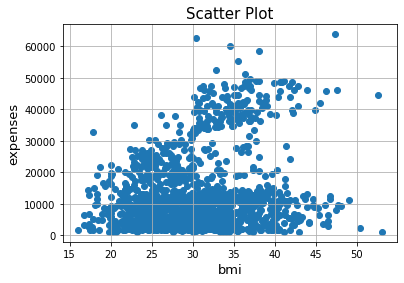

In [27]:
# let's check bmi versus expenses scatterplot
plt.scatter(df["bmi"], df["expenses"])
plt.xlabel("bmi", fontsize = 13)
plt.ylabel("expenses", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

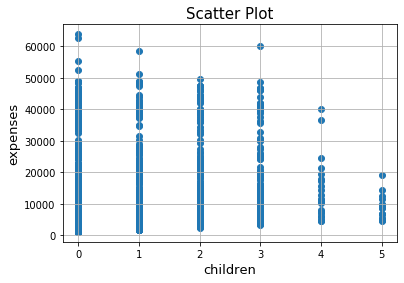

In [28]:
plt.scatter(df["children"], df["expenses"])
plt.xlabel("children", fontsize = 13)
plt.ylabel("expenses", fontsize = 13)
plt.title("Scatter Plot", fontsize = 15)
plt.grid()
plt.show()

## Correlation using Heatmap

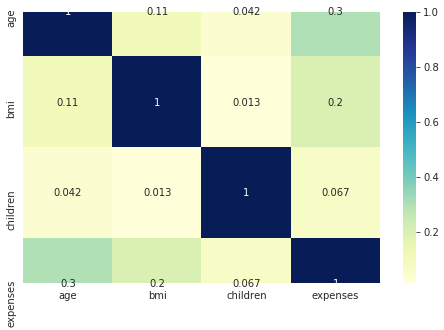

In [29]:
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 5))
    ax=sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")

## Handling Categorical Features

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [31]:
# Handling categorical feature sex
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [32]:
df['sex']=df['sex'].map({'female':0,'male':1})

In [33]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,yes,southwest,16884.92
1,18,1,33.8,1,no,southeast,1725.55
2,28,1,33.0,3,no,southeast,4449.46
3,33,1,22.7,0,no,northwest,21984.47
4,32,1,28.9,0,no,northwest,3866.86


In [34]:
# Handling categorical feature smoker
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [35]:
df['smoker']=df['smoker'].map({'no':0,'yes':1})

In [36]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,southwest,16884.92
1,18,1,33.8,1,0,southeast,1725.55
2,28,1,33.0,3,0,southeast,4449.46
3,33,1,22.7,0,0,northwest,21984.47
4,32,1,28.9,0,0,northwest,3866.86


In [37]:
# Handling categorical feature region
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [38]:
df['region']=df['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,1,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,3,21984.47
4,32,1,28.9,0,0,3,3866.86


## Split the data into X & y

In [40]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [41]:
X = df.drop(['expenses'],axis=1)

In [42]:
y = df['expenses']

## Train Test Split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Model Building

## Model 1: Using Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

In [47]:
# Evaluating the Algorithm
from sklearn.metrics import r2_score
score1 = r2_score(y_test, y_pred1)
print(score1)

0.8068280291899952


In [48]:
# Evaluating metrics
from sklearn import metrics

In [49]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 4182.597271311557
MSE: 35496521.90058503
RMSE: 5957.895761137906


In [50]:
df_1 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred1,'Variance':y_test-y_pred1})
df_1.head()

,Actual,Predicted,Variance
900,8688.86,8072.773331,616.086669
1064,5708.87,5592.826031,116.043969
1256,11436.74,14384.173654,-2947.433654
298,38746.36,31735.184973,7011.175027
237,4463.21,9163.154452,-4699.944452


Text(0.5, 0.98, 'Actual vs Predicted')

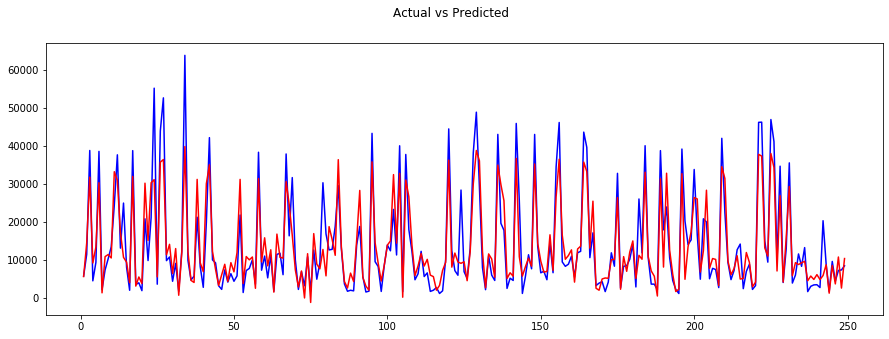

In [51]:
c=[i for i in range(1,250,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,y_test[1:250],color="blue")
plt.plot(c,y_pred1[1:250],color="red")
fig.suptitle("Actual vs Predicted")

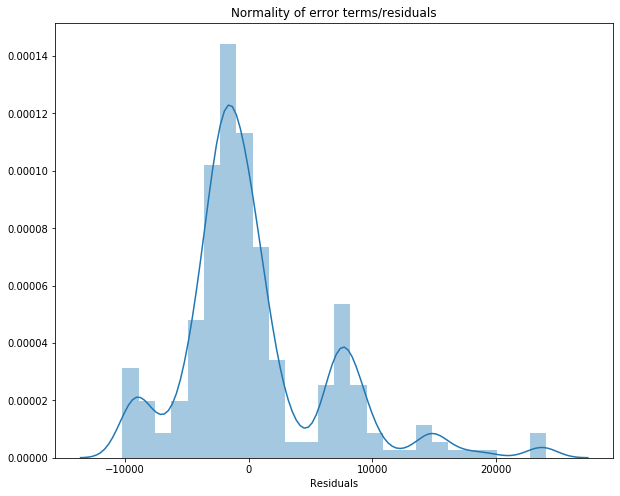

In [52]:
# Distribution of errors

plt.figure(figsize = (10,8))

p = sns.distplot(df_1['Variance'],kde=True)

p = plt.title('Normality of error terms/residuals')

plt.xlabel("Residuals")
plt.show()

## Model 2: Using Support Vector Regressor

In [53]:
from sklearn.svm import SVR

In [54]:
svm = SVR()
svm.fit(X_train,y_train)
y_pred2 = svm.predict(X_test)

In [55]:
# Evaluating the Algorithm
score2 = r2_score(y_test, y_pred2)
print(score2)

-0.1344469486786597


In [56]:
# Evaluating metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 9249.564867994342
MSE: 208461511.21184444
RMSE: 14438.196258946075


In [57]:
df_2 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred2,'Variance':y_test-y_pred2})
df_2.head()

,Actual,Predicted,Variance
900,8688.86,9285.046873,-596.186873
1064,5708.87,9160.047578,-3451.177578
1256,11436.74,9304.073967,2132.666033
298,38746.36,9173.348009,29573.011991
237,4463.21,9176.205147,-4712.995147


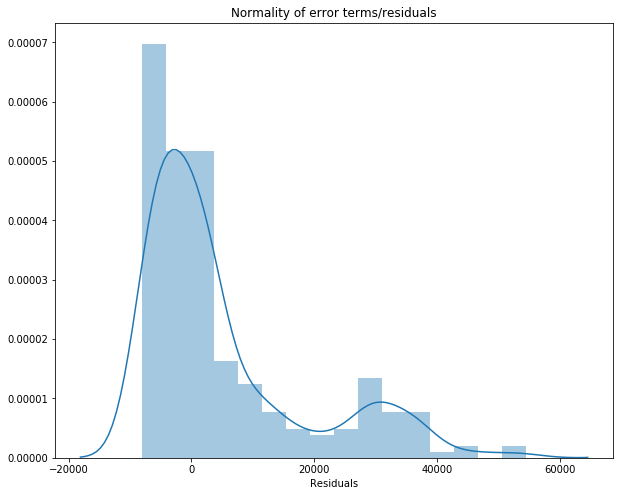

In [58]:
plt.figure(figsize = (10,8))

p = sns.distplot(df_2['Variance'],kde=True)

p = plt.title('Normality of error terms/residuals')

plt.xlabel("Residuals")
plt.show()

Text(0.5, 0.98, 'Actual vs Predicted')

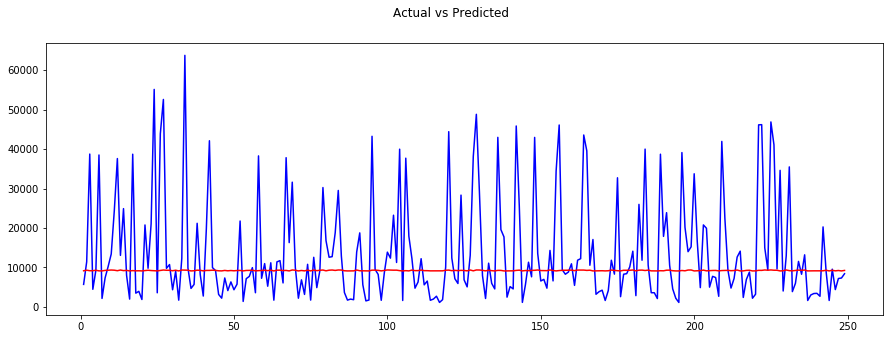

In [59]:
c=[i for i in range(1,250,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,y_test[1:250],color="blue")
plt.plot(c,y_pred2[1:250],color="red")
fig.suptitle("Actual vs Predicted")

## Feature Importance
Let us check which feature is important for our target variable

In [60]:
## Feature Importance
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [61]:
print(model.feature_importances_)

[0.1292598  0.01012543 0.1943133  0.02435568 0.62056564 0.02138016]


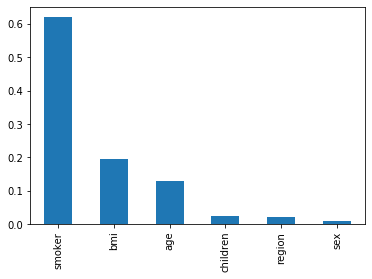

In [62]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='bar')
plt.show()

## Model 3: Using Random Forest Regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor

In [64]:
rf = RandomForestRegressor()

In [65]:
## Hyperparameters
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [66]:
from sklearn.model_selection import RandomizedSearchCV

In [67]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [68]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [69]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10,
                              cv = 5, verbose = 2, random_state = 42, n_jobs = 1)

In [70]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   2.3s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.4min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [71]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 20}

In [72]:
rf_random.best_score_

-21698003.44506105

In [73]:
y_pred3 = rf_random.predict(X_test)

In [74]:
# Evaluating the Algorithm
score3 = r2_score(y_test, y_pred3)
print(score3)

0.9010843799234978


In [75]:
# Evaluating metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 2453.340067494209
MSE: 18176345.458570328
RMSE: 4263.372545130243


In [76]:
df_3 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred3,'Variance':y_test-y_pred3})
df_3.head()

,Actual,Predicted,Variance
900,8688.86,10791.313242,-2102.453242
1064,5708.87,5679.396049,29.473951
1256,11436.74,12756.528541,-1319.788541
298,38746.36,39751.950061,-1005.590061
237,4463.21,5377.639897,-914.429897


Text(0.5, 0.98, 'Actual vs Predicted')

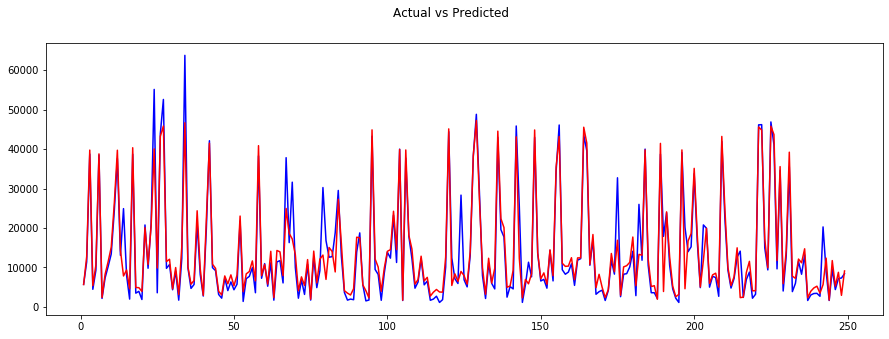

In [77]:
c=[i for i in range(1,250,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,y_test[1:250],color="blue")
plt.plot(c,y_pred3[1:250],color="red")
fig.suptitle("Actual vs Predicted")

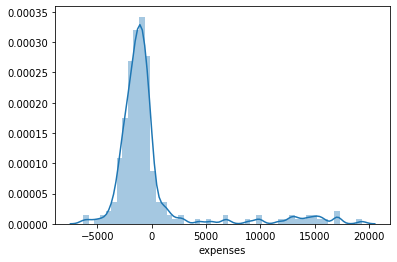

In [78]:
sns.distplot(y_test-y_pred3)

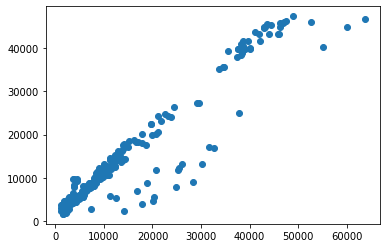

In [79]:
plt.scatter(y_test,y_pred3)

## Model 4: Using Gradient Boosting

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

In [81]:
gbr = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

#Important Parameters
#n_estimators: Number of weak learners to train iteratively.
#learning_rate: It contributes to the weights of weak learners. It uses 1 as default value.

In [82]:
gbr.fit(X_train,y_train)
y_pred4 = gbr.predict(X_test)

In [83]:
score4 = r2_score(y_test, y_pred4)
print(score4)

0.8886021346716246


## Hyperparameters Tuning

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
# Create the param grid
param_grid={'n_estimators':[100,150,200,250],
             'learning_rate':[.001,0.01,.1,0.15,0.05],
             'max_depth':[1,2,4],
             'subsample':[.5,.75,1],
             'random_state':[1]}

In [86]:
gbr_model = GridSearchCV(gbr, param_grid, scoring='r2',cv = 5, verbose = 2, n_jobs = 1)

In [87]:
gbr_model.fit(X_train,y_train)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.5, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.75 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.75, total=   0.1s
[CV] learning_rate=0.001, max_depth=1, n_estimators=100, random_state=1, subsample=0.75 
[CV]  learning_rate=0.001, max_depth=1, n_

[CV]  learning_rate=0.001, max_depth=1, n_estimators=250, random_state=1, subsample=0.5, total=   0.3s
[CV] learning_rate=0.001, max_depth=1, n_estimators=250, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=250, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.001, max_depth=1, n_estimators=250, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=250, random_state=1, subsample=0.5, total=   0.3s
[CV] learning_rate=0.001, max_depth=1, n_estimators=250, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=250, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.001, max_depth=1, n_estimators=250, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, n_estimators=250, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.001, max_depth=1, n_estimators=250, random_state=1, subsample=0.75 
[CV]  learning_rate=0.001, max_depth=1, n_es

[CV]  learning_rate=0.001, max_depth=2, n_estimators=150, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, n_estimators=200, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=200, random_state=1, subsample=0.5, total=   0.3s
[CV] learning_rate=0.001, max_depth=2, n_estimators=200, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=200, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, n_estimators=200, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=200, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, n_estimators=200, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=2, n_estimators=200, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, n_estimators=200, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=2, n_estim

[CV]  learning_rate=0.001, max_depth=4, n_estimators=100, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=100, random_state=1, subsample=1 
[CV]  learning_rate=0.001, max_depth=4, n_estimators=100, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=150, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=4, n_estimators=150, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=150, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=4, n_estimators=150, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=150, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=4, n_estimators=150, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.001, max_depth=4, n_estimators=150, random_state=1, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=4, n_estimator

[CV]  learning_rate=0.001, max_depth=4, n_estimators=250, random_state=1, subsample=1, total=   0.4s
[CV] learning_rate=0.001, max_depth=4, n_estimators=250, random_state=1, subsample=1 
[CV]  learning_rate=0.001, max_depth=4, n_estimators=250, random_state=1, subsample=1, total=   0.4s
[CV] learning_rate=0.001, max_depth=4, n_estimators=250, random_state=1, subsample=1 
[CV]  learning_rate=0.001, max_depth=4, n_estimators=250, random_state=1, subsample=1, total=   0.4s
[CV] learning_rate=0.01, max_depth=1, n_estimators=100, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=1, n_estimators=100, random_state=1, subsample=0.5, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=100, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=1, n_estimators=100, random_state=1, subsample=0.5, total=   0.1s
[CV] learning_rate=0.01, max_depth=1, n_estimators=100, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=1, n_estimators=100, ran

[CV]  learning_rate=0.01, max_depth=1, n_estimators=200, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, n_estimators=200, random_state=1, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, n_estimators=200, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, n_estimators=200, random_state=1, subsample=1 
[CV]  learning_rate=0.01, max_depth=1, n_estimators=200, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, n_estimators=250, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=1, n_estimators=250, random_state=1, subsample=0.5, total=   0.3s
[CV] learning_rate=0.01, max_depth=1, n_estimators=250, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=1, n_estimators=250, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.01, max_depth=1, n_estimators=250, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=1, n_estimators=250, random_s

[CV]  learning_rate=0.01, max_depth=2, n_estimators=150, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, n_estimators=150, random_state=1, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, n_estimators=150, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, n_estimators=150, random_state=1, subsample=1 
[CV]  learning_rate=0.01, max_depth=2, n_estimators=150, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, n_estimators=200, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=2, n_estimators=200, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, n_estimators=200, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=2, n_estimators=200, random_state=1, subsample=0.5, total=   0.3s
[CV] learning_rate=0.01, max_depth=2, n_estimators=200, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=2, n_estimators=200, random_s

[CV]  learning_rate=0.01, max_depth=4, n_estimators=100, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=100, random_state=1, subsample=1 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=100, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=100, random_state=1, subsample=1 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=100, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=100, random_state=1, subsample=1 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=100, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=150, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=150, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.01, max_depth=4, n_estimators=150, random_state=1, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=150, random_state

[CV]  learning_rate=0.01, max_depth=4, n_estimators=250, random_state=1, subsample=1, total=   0.4s
[CV] learning_rate=0.01, max_depth=4, n_estimators=250, random_state=1, subsample=1 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=250, random_state=1, subsample=1, total=   0.4s
[CV] learning_rate=0.01, max_depth=4, n_estimators=250, random_state=1, subsample=1 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=250, random_state=1, subsample=1, total=   0.4s
[CV] learning_rate=0.01, max_depth=4, n_estimators=250, random_state=1, subsample=1 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=250, random_state=1, subsample=1, total=   0.4s
[CV] learning_rate=0.01, max_depth=4, n_estimators=250, random_state=1, subsample=1 
[CV]  learning_rate=0.01, max_depth=4, n_estimators=250, random_state=1, subsample=1, total=   0.4s
[CV] learning_rate=0.1, max_depth=1, n_estimators=100, random_state=1, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=100, random_state=1, su

[CV]  learning_rate=0.1, max_depth=1, n_estimators=200, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimators=200, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=200, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimators=200, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=200, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimators=200, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=200, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimators=200, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=200, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.1, max_depth=1, n_estimators=200, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=1, n_estimators=200, random_state=1, subsample=

[CV]  learning_rate=0.1, max_depth=2, n_estimators=150, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=150, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=2, n_estimators=150, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=150, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=2, n_estimators=150, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=150, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=2, n_estimators=150, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=150, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=2, n_estimators=150, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, n_estimators=150, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=2, n_estimators=150, random_state=1, subsample=

[CV]  learning_rate=0.1, max_depth=4, n_estimators=100, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=100, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=100, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=100, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=100, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=100, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=100, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=100, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=100, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, n_estimators=100, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=100, random_state=1, subsample=

[CV]  learning_rate=0.1, max_depth=4, n_estimators=250, random_state=1, subsample=0.75, total=   0.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=250, random_state=1, subsample=0.75 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=250, random_state=1, subsample=0.75, total=   0.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=250, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=250, random_state=1, subsample=1, total=   0.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=250, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=250, random_state=1, subsample=1, total=   0.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=250, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=250, random_state=1, subsample=1, total=   0.4s
[CV] learning_rate=0.1, max_depth=4, n_estimators=250, random_state=1, subsample=1 
[CV]  learning_rate=0.1, max_depth=4, n_estimators=250, random_state=1, subs

[CV]  learning_rate=0.15, max_depth=2, n_estimators=150, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.15, max_depth=2, n_estimators=150, random_state=1, subsample=0.75 
[CV]  learning_rate=0.15, max_depth=2, n_estimators=150, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.15, max_depth=2, n_estimators=150, random_state=1, subsample=0.75 
[CV]  learning_rate=0.15, max_depth=2, n_estimators=150, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.15, max_depth=2, n_estimators=150, random_state=1, subsample=0.75 
[CV]  learning_rate=0.15, max_depth=2, n_estimators=150, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.15, max_depth=2, n_estimators=150, random_state=1, subsample=1 
[CV]  learning_rate=0.15, max_depth=2, n_estimators=150, random_state=1, subsample=1, total=   0.2s
[CV] learning_rate=0.15, max_depth=2, n_estimators=150, random_state=1, subsample=1 
[CV]  learning_rate=0.15, max_depth=2, n_estimators=15

[CV]  learning_rate=0.15, max_depth=4, n_estimators=100, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.15, max_depth=4, n_estimators=100, random_state=1, subsample=0.75 
[CV]  learning_rate=0.15, max_depth=4, n_estimators=100, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.15, max_depth=4, n_estimators=100, random_state=1, subsample=0.75 
[CV]  learning_rate=0.15, max_depth=4, n_estimators=100, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.15, max_depth=4, n_estimators=100, random_state=1, subsample=0.75 
[CV]  learning_rate=0.15, max_depth=4, n_estimators=100, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.15, max_depth=4, n_estimators=100, random_state=1, subsample=0.75 
[CV]  learning_rate=0.15, max_depth=4, n_estimators=100, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.15, max_depth=4, n_estimators=100, random_state=1, subsample=1 
[CV]  learning_rate=0.15, max_depth=4, n_estimat

[CV]  learning_rate=0.15, max_depth=4, n_estimators=250, random_state=1, subsample=0.5, total=   0.4s
[CV] learning_rate=0.15, max_depth=4, n_estimators=250, random_state=1, subsample=0.75 
[CV]  learning_rate=0.15, max_depth=4, n_estimators=250, random_state=1, subsample=0.75, total=   0.5s
[CV] learning_rate=0.15, max_depth=4, n_estimators=250, random_state=1, subsample=0.75 
[CV]  learning_rate=0.15, max_depth=4, n_estimators=250, random_state=1, subsample=0.75, total=   0.4s
[CV] learning_rate=0.15, max_depth=4, n_estimators=250, random_state=1, subsample=0.75 
[CV]  learning_rate=0.15, max_depth=4, n_estimators=250, random_state=1, subsample=0.75, total=   0.4s
[CV] learning_rate=0.15, max_depth=4, n_estimators=250, random_state=1, subsample=0.75 
[CV]  learning_rate=0.15, max_depth=4, n_estimators=250, random_state=1, subsample=0.75, total=   0.5s
[CV] learning_rate=0.15, max_depth=4, n_estimators=250, random_state=1, subsample=0.75 
[CV]  learning_rate=0.15, max_depth=4, n_estim

[CV]  learning_rate=0.05, max_depth=1, n_estimators=200, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, n_estimators=200, random_state=1, subsample=0.5 
[CV]  learning_rate=0.05, max_depth=1, n_estimators=200, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, n_estimators=200, random_state=1, subsample=0.75 
[CV]  learning_rate=0.05, max_depth=1, n_estimators=200, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, n_estimators=200, random_state=1, subsample=0.75 
[CV]  learning_rate=0.05, max_depth=1, n_estimators=200, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, n_estimators=200, random_state=1, subsample=0.75 
[CV]  learning_rate=0.05, max_depth=1, n_estimators=200, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.05, max_depth=1, n_estimators=200, random_state=1, subsample=0.75 
[CV]  learning_rate=0.05, max_depth=1, n_estimat

[CV]  learning_rate=0.05, max_depth=2, n_estimators=150, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, n_estimators=150, random_state=1, subsample=0.5 
[CV]  learning_rate=0.05, max_depth=2, n_estimators=150, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, n_estimators=150, random_state=1, subsample=0.75 
[CV]  learning_rate=0.05, max_depth=2, n_estimators=150, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, n_estimators=150, random_state=1, subsample=0.75 
[CV]  learning_rate=0.05, max_depth=2, n_estimators=150, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, n_estimators=150, random_state=1, subsample=0.75 
[CV]  learning_rate=0.05, max_depth=2, n_estimators=150, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.05, max_depth=2, n_estimators=150, random_state=1, subsample=0.75 
[CV]  learning_rate=0.05, max_depth=2, n_estimat

[CV]  learning_rate=0.05, max_depth=4, n_estimators=100, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.05, max_depth=4, n_estimators=100, random_state=1, subsample=0.5 
[CV]  learning_rate=0.05, max_depth=4, n_estimators=100, random_state=1, subsample=0.5, total=   0.2s
[CV] learning_rate=0.05, max_depth=4, n_estimators=100, random_state=1, subsample=0.75 
[CV]  learning_rate=0.05, max_depth=4, n_estimators=100, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.05, max_depth=4, n_estimators=100, random_state=1, subsample=0.75 
[CV]  learning_rate=0.05, max_depth=4, n_estimators=100, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.05, max_depth=4, n_estimators=100, random_state=1, subsample=0.75 
[CV]  learning_rate=0.05, max_depth=4, n_estimators=100, random_state=1, subsample=0.75, total=   0.2s
[CV] learning_rate=0.05, max_depth=4, n_estimators=100, random_state=1, subsample=0.75 
[CV]  learning_rate=0.05, max_depth=4, n_estimat

[CV]  learning_rate=0.05, max_depth=4, n_estimators=250, random_state=1, subsample=0.5, total=   0.4s
[CV] learning_rate=0.05, max_depth=4, n_estimators=250, random_state=1, subsample=0.5 
[CV]  learning_rate=0.05, max_depth=4, n_estimators=250, random_state=1, subsample=0.5, total=   0.4s
[CV] learning_rate=0.05, max_depth=4, n_estimators=250, random_state=1, subsample=0.5 
[CV]  learning_rate=0.05, max_depth=4, n_estimators=250, random_state=1, subsample=0.5, total=   0.4s
[CV] learning_rate=0.05, max_depth=4, n_estimators=250, random_state=1, subsample=0.75 
[CV]  learning_rate=0.05, max_depth=4, n_estimators=250, random_state=1, subsample=0.75, total=   0.5s
[CV] learning_rate=0.05, max_depth=4, n_estimators=250, random_state=1, subsample=0.75 
[CV]  learning_rate=0.05, max_depth=4, n_estimators=250, random_state=1, subsample=0.75, total=   0.4s
[CV] learning_rate=0.05, max_depth=4, n_estimators=250, random_state=1, subsample=0.75 
[CV]  learning_rate=0.05, max_depth=4, n_estimator

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  3.4min finished


GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=1.0, max_depth=2,
                                                 n_estimators=3),
             n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.15, 0.05],
                         'max_depth': [1, 2, 4],
                         'n_estimators': [100, 150, 200, 250],
                         'random_state': [1], 'subsample': [0.5, 0.75, 1]},
             scoring='r2', verbose=2)

In [88]:
gbr_model.best_params_

{'learning_rate': 0.05,
 'max_depth': 2,
 'n_estimators': 150,
 'random_state': 1,
 'subsample': 0.75}

In [89]:
y_pred_gb = gbr_model.predict(X_test)

In [90]:
# Evaluating the Algorithm
score_gb = r2_score(y_test, y_pred_gb)
print(score_gb)

0.9010125953324677


In [91]:
# Evaluating metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gb))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gb))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gb)))

MAE: 2515.741060762318
MSE: 18189536.312796935
RMSE: 4264.919262166276


In [92]:
df_4 = pd.DataFrame({'Actual':y_test,'Predicted':y_pred_gb,'Variance':y_test-y_pred_gb})
df_4.head()

,Actual,Predicted,Variance
900,8688.86,9842.494413,-1153.634413
1064,5708.87,6880.928801,-1172.058801
1256,11436.74,13283.033430,-1846.293430
298,38746.36,38448.837168,297.522832
237,4463.21,6664.567231,-2201.357231


Text(0.5, 0.98, 'Actual vs Predicted')

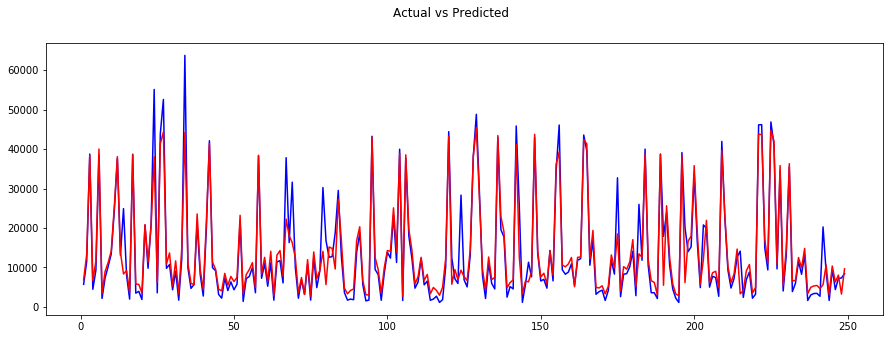

In [93]:
c=[i for i in range(1,250,1)]
fig=plt.figure(figsize=(15,5))
plt.plot(c,y_test[1:250],color="blue")
plt.plot(c,y_pred_gb[1:250],color="red")
fig.suptitle("Actual vs Predicted")

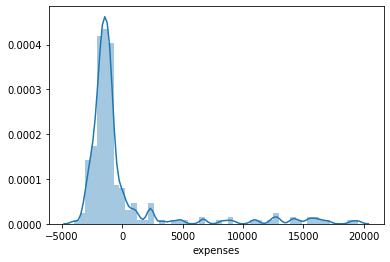

In [94]:
sns.distplot(y_test-y_pred_gb)

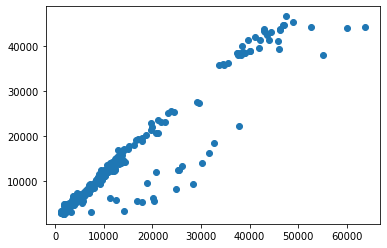

In [95]:
plt.scatter(y_test,y_pred_gb)

## Comparing predicted values for all models

In [96]:
df_5 = pd.DataFrame({'Actual':y_test,'Lr':y_pred1,'svm':y_pred2,'rf':y_pred3,'gb':y_pred_gb})
df_5.head()

,Actual,Lr,svm,rf,gb
900,8688.86,8072.773331,9285.046873,10791.313242,9842.494413
1064,5708.87,5592.826031,9160.047578,5679.396049,6880.928801
1256,11436.74,14384.173654,9304.073967,12756.528541,13283.033430
298,38746.36,31735.184973,9173.348009,39751.950061,38448.837168
237,4463.21,9163.154452,9176.205147,5377.639897,6664.567231


In [97]:
print(score1,score2,score3,score_gb)

0.8068280291899952 -0.1344469486786597 0.9010843799234978 0.9010125953324677


## Compare Performance Visually

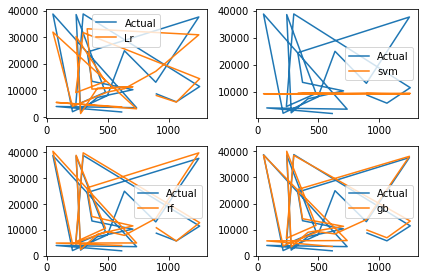

In [98]:
plt.subplot(221)
plt.plot(df_5['Actual'].iloc[0:21],label='Actual')
plt.plot(df_5['Lr'].iloc[0:21],label='Lr')
plt.legend()

plt.subplot(222)
plt.plot(df_5['Actual'].iloc[0:21],label='Actual')
plt.plot(df_5['svm'].iloc[0:21],label='svm')
plt.legend()

plt.subplot(223)
plt.plot(df_5['Actual'].iloc[0:21],label='Actual')
plt.plot(df_5['rf'].iloc[0:21],label='rf')
plt.legend()

plt.subplot(224)
plt.plot(df_5['Actual'].iloc[0:21],label='Actual')
plt.plot(df_5['gb'].iloc[0:21],label='gb')

plt.tight_layout()

plt.legend()

In [99]:
# Evaluating the Algorithm
s1 = metrics.mean_absolute_error(y_test, y_pred1)
s2 = metrics.mean_absolute_error(y_test, y_pred2)
s3 = metrics.mean_absolute_error(y_test, y_pred3)
s4 = metrics.mean_absolute_error(y_test, y_pred_gb)

In [100]:
print(s1,s2,s3,s4)

4182.597271311557 9249.564867994342 2453.340067494209 2515.741060762318


So by this different evaluation we can see that model 3 has lower MAE value as compared to other models.
So we can conclude that model 3 i.e. Random Forest Regressor is the best model for our dataset. So we are going to use model 3 
for predictions and deployment.

## Predict Charges for New Customer

In [103]:
data = {'age':40,
        'sex':1,
        'bmi':40.30,
        'children':4,
        'smoker':1,
        'region':2}

new_df = pd.DataFrame(data,index=[0])
new_df

,age,sex,bmi,children,smoker,region
0,40,1,40.3,4,1,2


In [104]:
new_pred = rf_random.predict(new_df)
print(new_pred)

[43217.20906468]


## Save Model Using Joblib

Now we are going to train Random Forest Regressor on entire dataset before deployment

In [106]:
rf_random.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   3.1s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.5s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   2.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   3.1s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.4s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.7min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

Now our model is trained on entire dataset.
Now let's save this model.

In [107]:
import joblib

In [108]:
joblib.dump(rf_random,'model_random_forest_regression')

['model_random_forest_regression']

In [109]:
model = joblib.load('model_random_forest_regression')

In [110]:
model.predict(new_df)

array([43392.76727273])